In [2]:
import numpy as np
import pandas as pd

# Loading & Preprocessing Data

In [4]:
# Read the CSV file "News-Topic-Modeling.csv" into a DataFrame
df = pd.read_csv("News-Topic-Modeling.csv")

# Display the first 5 rows of the DataFrame
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [5]:
# Print the 'title' of the second row in the DataFrame
print(df.iloc[1]["title"])

# Print the 'description' of the second row in the DataFrame
print(df.iloc[1]["description"])

War in Ukraine: Taking cover in a town under attack
Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.


In [6]:
# Concatenate the 'title' and 'description' columns with a space separator
# The result is stored in a new column 'text'
df['text'] = df["title"].str.cat(df["description"], sep=" ")

# Define a list of columns to be dropped from the DataFrame
columns_to_drop = ["title", "description", "guid", "link", "pubDate"]

# Drop the unnecessary columns from the DataFrame
# 'inplace=True' ensures that the DataFrame is modified directly
df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame
df

,text
0,Ukraine: Angry Zelensky vows to punish Russian...
1,War in Ukraine: Taking cover in a town under a...
2,Ukraine war 'catastrophic for global food' One...
3,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...
...,...
27431,"St Mirren 0-3 Celtic: Maeda, O'Riley & Taylor ..."
27432,Jadon Sancho: Manchester United winger might r...
27433,West Ham 0-0 Brighton: Journalists are happy t...
27434,Emma Raducanu battles to victory at Auckland C...


**Checking Null Values**

In [7]:
# Check for any null values in the DataFrame
null_values = df.isnull().sum()

# Print the result
print(null_values)

text    0
dtype: int64


**Checking WhiteSpace**

In [8]:
blanks = []

for i,text in df.itertuples():  # iterate over the DataFrame
    if text.isspace():         # test 'email' for whitespace
        blanks.append(i)     # add matching index numbers to the list

print(len(blanks),"   |    ", 'blanks: ', blanks  )

0    |     blanks:  []


**Cleaning Data Using NLTK**

In [10]:
# Import the 'stopwords' corpus from the nltk library
# Stop words are words like 'is', 'the', 'a', etc. that do not contain important meaning
# and are usually removed from texts
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

# Import the 'WordNetLemmatizer' from the nltk library
# Lemmatization is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form
from nltk.stem import WordNetLemmatizer

# Get the list of English stop words
sw = stopwords.words('english')

# Instantiate the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hossein\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hossein\AppData\Roaming\nltk_data...


In [11]:
def preprocess_text(messy_string):
    # Assert that the input is a string
    assert(type(messy_string) == str)

    # Split the string into words, lemmatize each word, remove stop words,
    # and then join the words back into a string
    # 'lemmatizer.lemmatize(word)' reduces the word to its base or root form
    # 'word not in sw' removes stop words
    cleaned = ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw])

    # Return the cleaned text
    return cleaned

In [12]:
# Apply the 'preprocess_text' function to each element in the 'text' column of the DataFrame
# The result is stored in a new column 'cleaned'
df['cleaned'] = df['text'].apply(preprocess_text)

# Display the DataFrame
df

,text,cleaned
0,Ukraine: Angry Zelensky vows to punish Russian...,Ukraine: Angry Zelensky vow punish Russian atr...
1,War in Ukraine: Taking cover in a town under a...,War Ukraine: Taking cover town attack Jeremy B...
2,Ukraine war 'catastrophic for global food' One...,Ukraine war 'catastrophic global food' One wor...
3,Manchester Arena bombing: Saffie Roussos's par...,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...,Ukraine conflict: Oil price soar highest level...
...,...,...
27431,"St Mirren 0-3 Celtic: Maeda, O'Riley & Taylor ...","St Mirren 0-3 Celtic: Maeda, O'Riley & Taylor ..."
27432,Jadon Sancho: Manchester United winger might r...,Jadon Sancho: Manchester United winger might r...
27433,West Ham 0-0 Brighton: Journalists are happy t...,West Ham 0-0 Brighton: Journalists happy kept ...
27434,Emma Raducanu battles to victory at Auckland C...,Emma Raducanu battle victory Auckland Classic ...


# Importing  & Training Model

In [14]:
# Import the 'CountVectorizer' and 'TfidfVectorizer' from the sklearn library
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

# Instantiate a CountVectorizer for LDA (Latent Dirichlet Allocation)
# 'max_df' is set to 0.95, meaning it ignores terms that appear in more than 95% of the documents
# 'min_df' is set to 2, meaning it ignores terms that appear in less than 2 documents
# 'stop_words' is set to 'english', meaning it will remove English stop words before vectorizing
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit the CountVectorizer to the 'cleaned' column of the DataFrame and transform the data
X_lda = count_vectorizer.fit_transform(df['cleaned'])

# Instantiate a TfidfVectorizer for NMF (Non-negative Matrix Factorization)
# The parameters are the same as for the CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit the TfidfVectorizer to the 'cleaned' column of the DataFrame and transform the data
X_nmf = tfidf_vectorizer.fit_transform(df['cleaned'])

In [15]:
# Import the 'NMF' and 'LatentDirichletAllocation' from the sklearn library
from sklearn.decomposition import NMF, LatentDirichletAllocation

# Instantiate a LatentDirichletAllocation model with 10 components
# 'random_state' is set to 42 for reproducibility
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit the LDA model to the data stored in 'X_lda'
lda_model.fit(X_lda)

# Instantiate a NMF model with 10 components
# 'random_state' is set to 42 for reproducibility
nmf_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the data stored in 'X_nmf'
nmf_model.fit(X_nmf)

NMF(n_components=10, random_state=42)

# Checking the Results

In [16]:
lda_model.components_.shape

(10, 17376)

In [17]:
count_vectorizer.get_feature_names_out()[7812]

'imploded'

In [18]:
# Loop over each topic in the LDA model's components
for index, topic in enumerate(lda_model.components_):
    # Print the topic number
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')

    # Get the indices of the top 15 words for the current topic
    # 'argsort()' returns the indices that would sort the topic's words
    # '[-15:]' gets the last 15 indices, corresponding to the top 15 words
    # 'get_feature_names_out()[i]' gets the word corresponding to the index 'i'
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])

    # Print a newline for readability
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['football', 'wales', 'score', 'euro', 'france', 'charles', 'women', 'win', 'queen', 'king', 'final', 'england', '2022', 'world', 'cup']


THE TOP 15 WORDS FOR TOPIC #1
['zealand', 'liverpool', 'match', 'chelsea', 'club', 'manager', 'day', 'test', 'new', 'premier', 'united', 'league', 'manchester', 'say', 'england']


THE TOP 15 WORDS FOR TOPIC #2
['doctor', 'life', 'strike', 'health', 'cancer', 'school', 'days', 'police', 'past', 'seven', 'bbc', 'harry', 'week', 'prince', 'say']


THE TOP 15 WORDS FOR TOPIC #3
['bank', 'food', 'rising', 'pay', 'rate', 'rise', 'new', 'covid', 'price', 'government', 'people', 'living', 'uk', 'cost', 'say']


THE TOP 15 WORDS FOR TOPIC #4
['africa', 'hit', 'mortgage', 'world', 'country', 'new', 'town', 'north', 'city', 'war', 'home', 'south', 'say', 'bbc', 'people']


THE TOP 15 WORDS FOR TOPIC #5
['victory', 'champions', 'cup', 'watch', 'women', 'title', 'city', 'england', 'beat', 'open', '2023', 'final', 'league', 'world',

THE TOP 15 WORDS FOR TOPIC #0
['quarter', '2023', 'watch', 'finals', 'wales', 'rugby', 'semi', 'argentina', 'france', 'qatar', 'women', '2022', 'final', 'cup', 'world']


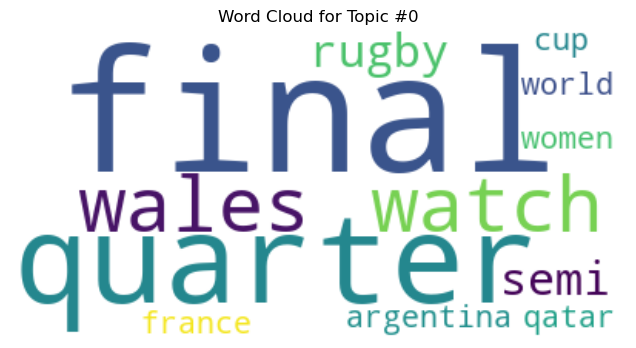

THE TOP 15 WORDS FOR TOPIC #1
['military', 'force', 'attack', 'city', 'say', 'zelensky', 'president', 'kyiv', 'ukrainian', 'invasion', 'putin', 'russian', 'russia', 'war', 'ukraine']


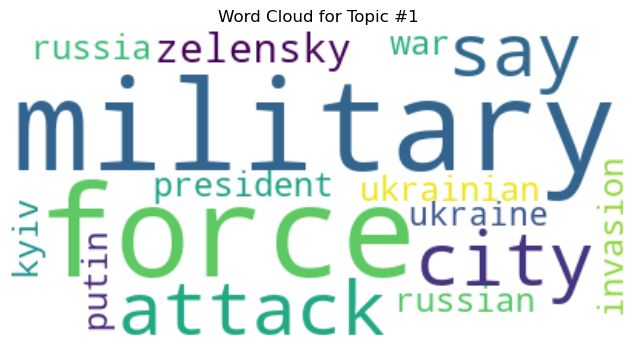

THE TOP 15 WORDS FOR TOPIC #2
['murder', 'died', 'child', 'family', 'death', 'bbc', 'new', 'people', 'home', 'man', 'woman', 'old', 'police', 'year', 'say']


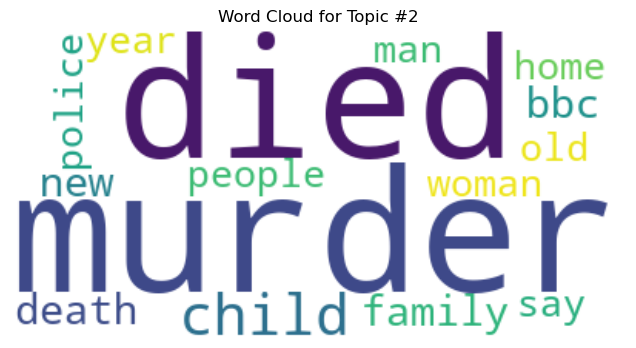

THE TOP 15 WORDS FOR TOPIC #3
['score', 'final', 'goal', 'title', 'man', 'chelsea', 'arsenal', 'win', 'champions', 'liverpool', 'premier', 'united', 'city', 'manchester', 'league']


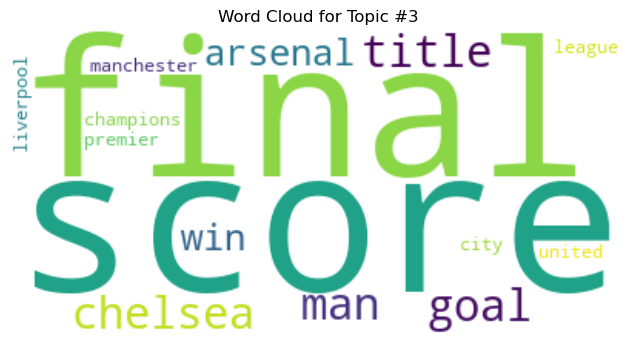

THE TOP 15 WORDS FOR TOPIC #4
['globe', 'striking', 'taken', 'pictures', 'going', 'image', 'paying', 'attention', 'closely', 'quiz', 'selection', 'past', 'seven', 'days', 'week']


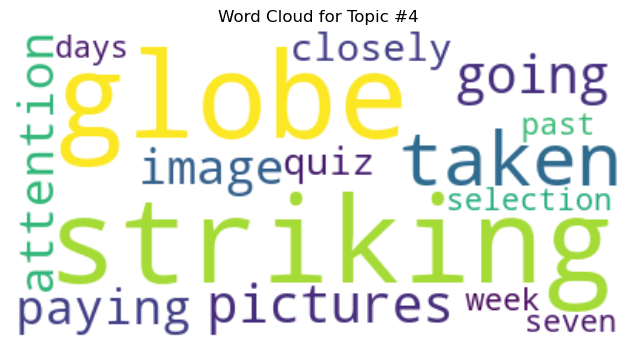

THE TOP 15 WORDS FOR TOPIC #5
['money', 'help', 'prices', 'household', 'high', 'food', 'rise', 'inflation', 'energy', 'rising', 'price', 'rate', 'living', 'uk', 'cost']


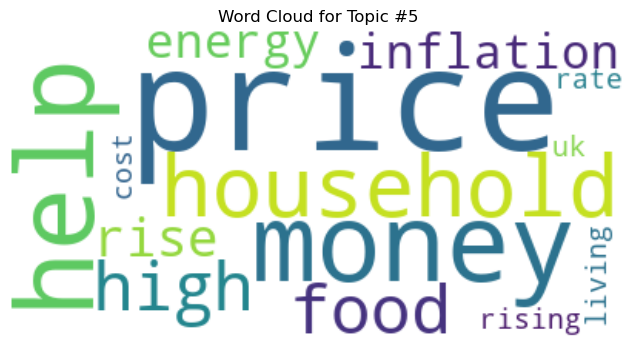

THE TOP 15 WORDS FOR TOPIC #6
['leadership', 'mps', 'new', 'party', 'papers', 'tory', 'liz', 'boris', 'truss', 'johnson', 'pm', 'prime', 'rishi', 'minister', 'sunak']


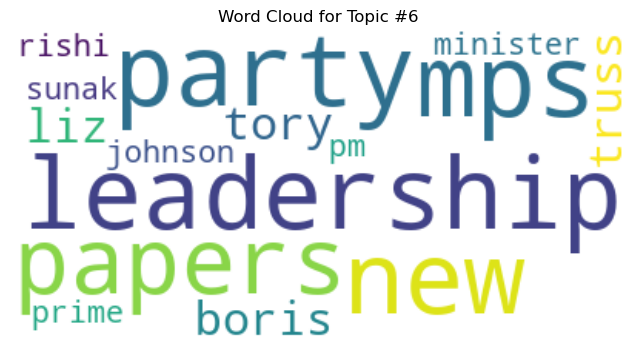

THE TOP 15 WORDS FOR TOPIC #7
['africa', 'new', 'nations', 'final', 'zealand', 'day', 'series', '2022', 'women', 'win', 'ashes', 'australia', 'euro', 'test', 'england']


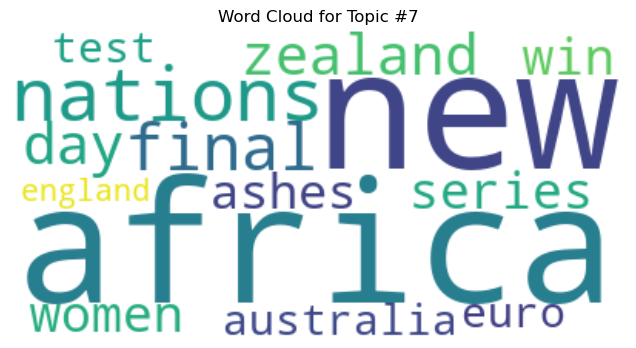

THE TOP 15 WORDS FOR TOPIC #8
['war', 'captive', 'elderly', 'young', 'palestinian', 'killed', 'hostages', 'taken', 'israeli', 'hostage', 'attack', 'people', 'hamas', 'gaza', 'israel']


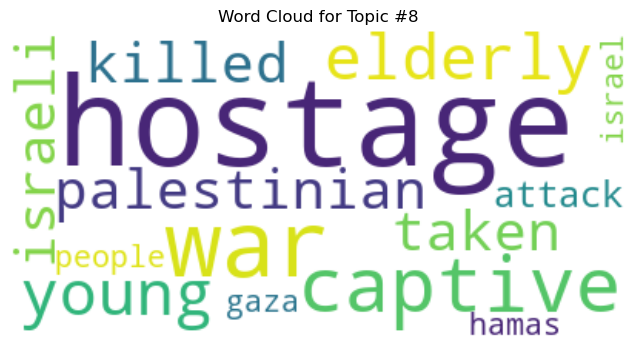

THE TOP 15 WORDS FOR TOPIC #9
['elizabeth', 'coronation', 'royal', 'action', 'strikes', 'union', 'worker', 'charles', 'rail', 'pay', 'train', 'day', 'king', 'queen', 'strike']


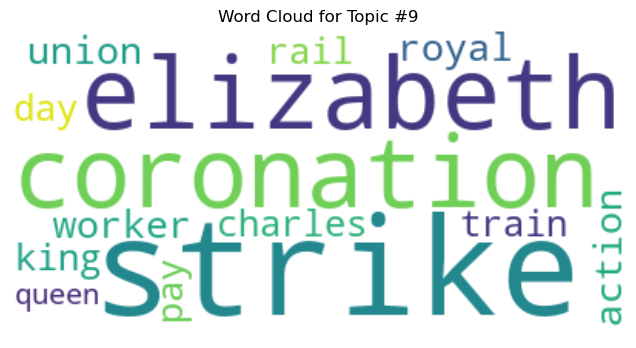

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you've already initialized nmf_model, tfidf_vectorizer, and tfidf_data

# Loop over each topic in the NMF model's components
for index, topic in enumerate(nmf_model.components_):
    # Print the topic number
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')

    # Get the indices of the top 15 words for the current topic
    top_words_indices = topic.argsort()[-15:]

    # Get the top 15 words for the current topic
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_words_indices]

    # Print the top words for the current topic
    print(top_words)

    # Create a WordCloud object
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(top_words))

    # Display the word cloud for the current topic
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{index}')
    plt.axis('off')
    plt.show()


# Evaluation

In [21]:
# Compute perplexity
perplexity = lda_model.perplexity(X_lda)
print(f"Perplexity: {perplexity}")

Perplexity: 3979.4565212166585
